In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [88]:
dtf = pd.read_csv('carprices.csv')
dtf

,car_model,mileage,sell_price,age_yrs
0,BMW_X5,69000,18000,6
1,BMW_X5,35000,34000,3
2,BMW_X5,57000,26100,5
3,BMW_X5,22500,40000,2
4,BMW_X5,46000,31500,4
5,Audi_A5,59000,29400,5
6,Audi_A5,52000,32000,5
7,Audi_A5,72000,19300,6
8,Audi_A5,91000,12000,8
9,Mercedez_Benz_C_class,67000,22000,6


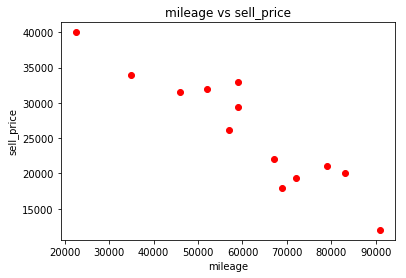

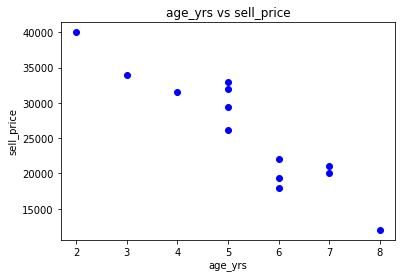

In [130]:
plt.scatter(dtf.mileage, dtf.sell_price, color='r')
plt.title('mileage vs sell_price')
plt.xlabel('mileage')
plt.ylabel('sell_price')
plt.show()

plt.scatter(dtf.age_yrs, dtf.sell_price, color='b')
plt.title('age_yrs vs sell_price')
plt.xlabel('age_yrs')
plt.ylabel('sell_price')
plt.show()

### Identifying colinearity between independent variables

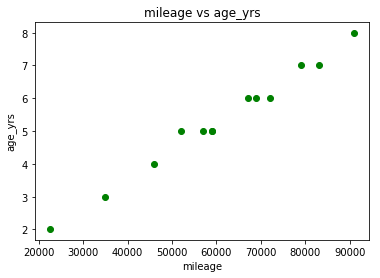

mileage vs age_yrs R^2 0.9869473989864677


In [200]:
""" There is high colinearity between mileage and age_yrs.
    We must avoid including both variables in the model. """ 
plt.scatter(dtf.mileage, dtf.age_yrs, color='g')
plt.title('mileage vs age_yrs')
plt.xlabel('mileage')
plt.ylabel('age_yrs')
plt.show()

mil_yrs_lrm = LinearRegression()
mil_yrs_lrm.fit(dtf[['mileage']].values, dtf.age_yrs)
r2 = mil_yrs_lrm.score(dtf[['mileage']].values, dtf.age_yrs)
print('mileage vs age_yrs R^2', r2)

### Computing Variance Inflation Factor (VIF)  for collinearity

In [205]:
"""
Implementation:
    https://etav.github.io/python/vif_factor_python.html (code below)

Interpretation: 
    https://www.displayr.com/variance-inflation-factors-vifs/
    A value of 1 means that the predictor is not correlated with other variables.
    The higher the value, the greater the correlation of the variable with other variables.
    Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values
    of 10 or more being regarded as very high. These numbers are just rules of thumb ...
"""

""" Computing VIFs """
vif_dtf = dtf[['mileage', 'age_yrs', 'sell_price']].copy()
vif_res_dtf = pd.DataFrame()
vif_res_dtf["features"] = vif_dtf.columns
vif_res_dtf['vif_factors'] = [variance_inflation_factor(vif_dtf.values, i) for i in range(vif_dtf.shape[1])]
print(vif_res_dtf)

""" Both mileage and age_yrs have very large VIFs, we must avoid including them at the same time in a the model """

     features  vif_factors
0     mileage   919.259349
1     age_yrs   931.060353
2  sell_price     3.507936


' Both mileage and age_yrs have very large VIFs, we must avoid including them at the same time in a the model '

In [207]:
""" Creates dummy variables"""
dummies_dtf = pd.get_dummies(dtf.car_model)
print(dummies_dtf)

""" Removes one dummy variable to avoid dummy trap """
dummies_dtf = dummies_dtf.iloc[:,1:]
print(dummies_dtf)

    Audi_A5  BMW_X5  Mercedez_Benz_C_class
0         0       1                      0
1         0       1                      0
2         0       1                      0
3         0       1                      0
4         0       1                      0
5         1       0                      0
6         1       0                      0
7         1       0                      0
8         1       0                      0
9         0       0                      1
10        0       0                      1
11        0       0                      1
12        0       0                      1
    BMW_X5  Mercedez_Benz_C_class
0        1                      0
1        1                      0
2        1                      0
3        1                      0
4        1                      0
5        0                      0
6        0                      0
7        0                      0
8        0                      0
9        0                      1
10       0              

### Single Linear Regression: age_yrs vs sell price (w/ dummy vars)

    BMW_X5  Mercedez_Benz_C_class  age_yrs
0        1                      0        6
1        1                      0        3
2        1                      0        5
3        1                      0        2
4        1                      0        4
5        0                      0        5
6        0                      0        5
7        0                      0        6
8        0                      0        8
9        0                      1        6
10       0                      1        7
11       0                      1        7
12       0                      1        5


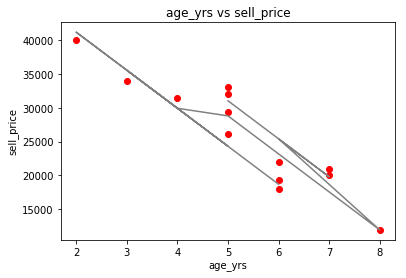

age_yrs vs sell price - R^2: 0.9315851574179888


In [232]:
""" Creates dataframe with mileage and dummy variables. """
X = pd.concat([dummies_dtf, dtf['age_yrs']], axis=1)

print(X)

""" Single Linear Regression (plus dummy vars): age_yrs vs sell price.""" 
yrs_lrm = LinearRegression()
yrs_lrm.fit(X, dtf.sell_price)
r2 = yrs_lrm.score(X, dtf.sell_price)

""" Visualization """
plt.scatter(dtf.age_yrs, dtf.sell_price, color='red')
plt.plot(dtf.age_yrs, yrs_lrm.predict(X), color='gray')
plt.title('age_yrs vs sell_price')
plt.xlabel('age_yrs')
plt.ylabel('sell_price')
plt.show()

print('age_yrs vs sell price - R^2:', r2)

# """ Prediction: Mercedez_Benz_C_class=0,1, mil=59000, yrs=5  -> sell=33000"""
# x = [[0,1,59000,5]]
# print(x)
# print([yrs_lrm.predict(x)])

### Single Linear Regression: mileage vs sell price  (w/ dummy vars)

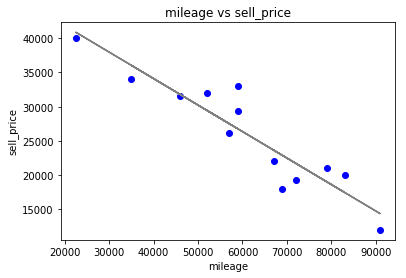

mileage vs sell price - R^2: 0.8595436655580696


In [220]:
""" Creates dataframe with mileage and dummy variables. """
X = pd.concat([dummies_dtf, dtf['mileage']], axis=1)

""" Single Linear Regression (plus dummy vars): mileage vs sell price.""" 
mil_lrm = LinearRegression()
mil_lrm.fit(X, dtf.sell_price)
r2 = mil_lrm.score(X, dtf.sell_price)

""" Visualization """
plt.scatter(dtf.mileage, dtf.sell_price, color='blue')
plt.plot(dtf.mileage, mil_lrm.predict(dtf[['mileage']].values), color='gray')
plt.title('mileage vs sell_price')
plt.xlabel('mileage')
plt.ylabel('sell_price')
plt.show()

print('mileage vs sell price - R^2:', r2)

In [117]:
""" Mercedez_Benz_C_class=0,1, mil=59000, yrs=5  -> sell=33000"""
x = [[0,1,59000,5]]
# print([lrm.predict(x)])
# sc_X.inverse_transform([lrm.predict(x)])


""" Audi_A5=0,0 mil=59000 yrs=5 -> sell=29400"""
# x = [[0,0,59000,5]]
# print(lrm.predict(x)) 

[array([-4.02506179e+08])]


' Audi_A5=0,0 mil=59000 yrs=5 -> sell=29400'